In [1]:
import numpy as np
import scipy.linalg
from numpy import kron as tp
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [22]:
font = {'size'   : 20}

matplotlib.rc('font', **font)

In [2]:
osc_levels = 20
E_q = np.diag([1,1])
sigma_x = np.array([[0,1],[1,0]])
sigma_z = np.array([[1,0],[0,-1]])
sigma_m = np.array([[0, 0],[1,0]])
sigma_p = np.array([[0,1],[0,0]])
varepsilon = 1 #GHz
omega = 1 #GHz
g = 0.1
delta = 0

def a():
    return np.diag([np.sqrt(x) for x in range(1, osc_levels)],1)
def a_p():
    return np.diag([np.sqrt(x) for x in range(1, osc_levels)],-1)

def build_H_0():
    E_r = np.diag(np.ones(osc_levels))
    H_q = tp(E_r, sigma_z*varepsilon/2+sigma_x*delta/2)
    H_r = tp(omega*np.diag([0.5 + _ for _ in range(0, osc_levels)]), E_q)
    return H_q+H_r
def build_H_i():
    return g*tp(a() + a_p(), sigma_x)
def build_H_i_RWA():
    return g*(tp(a_p(), sigma_m)+tp(a(), sigma_p))

##################### Test

def build_H_0_test():
    E_r = np.diag(np.ones(osc_levels))
    H_q = tp(E_r, sigma_z*sqrt(varepsilon**2+delta**2)/2)
    H_r = tp(omega*np.diag([0.5 + _ for _ in range(0, osc_levels)]), E_q)
    return H_q+H_r
def build_H_i_test():
    return g*tp(a() + a_p(), delta/sqrt(varepsilon**2+delta**2)*sigma_z-
                     varepsilon/sqrt(varepsilon**2+delta**2)*sigma_x)
def build_H_i_RWA_test():
    return -g*varepsilon/sqrt(varepsilon**2+delta**2)*(tp(a_p(), sigma_m)+tp(a(), sigma_p))\
#                     +g_test*varepsilon_test/sqrt(Delta_test**2+varepsilon_test**2)*tp(a_p()+a(), sigma_z)
def build_H_i_RWA_test2():
    return -g*varepsilon/sqrt(varepsilon**2+delta**2)*(tp(a_p(), sigma_m)+tp(a(), sigma_p))\
                    +g*delta/sqrt(varepsilon**2+delta**2)*tp(a_p()+a(), sigma_z)

In [3]:
def solve_eigenproblem(RWA=False):
    H = build_H_0()+ ( build_H_i_RWA() if RWA==True else build_H_i())
    evals_unpert, evecs_unpert = scipy.linalg.eigh(build_H_0())
    evals, evecs = scipy.linalg.eigh(H)
    return evals_unpert, evecs_unpert, evals, evecs

In [4]:
def solve_eigenproblem_test(RWA=False):
    H = build_H_0_test()+ ( build_H_i_RWA_test() if RWA==True else build_H_i_test())
    evals_unpert, evecs_unpert = scipy.linalg.eigh(build_H_0_test())
    evals, evecs = scipy.linalg.eigh(H)
    return evals_unpert, evecs_unpert, evals, evecs

## Anticrossing

In [5]:
import pickle as pkl
with open("../Графики/Feb 19 - Feb 06 2015/Feb 08 2015/15-11-47/res with freq1.075e+10.pkl", "rb") as f:
    data = pkl.load(f, encoding="latin-1").data

In [6]:
mask1 = np.ones(len(data[0]), dtype=bool)
a1=109
b1=113
idcs = list(range(a1, b1))
mask1[idcs]=False

currents = data[0]
currents = np.concatenate((currents[:a1], currents[b1:]-(currents[b1]-currents[a1])))
freqs = data[1]
amps = data[2][mask1, :freqs.shape[0]]
XX, YY = meshgrid(currents, freqs)

mask2 = np.ones(len(currents), dtype=bool)
a2=-20
b2=-29
idcs = list(range(b2, a2))
mask2[idcs]=False

currents = np.concatenate((currents[:b2], currents[a2:]-(currents[a2]-currents[b2])))
freqs = data[1]
amps = amps[mask2, :]

[ 99 100 101 226]


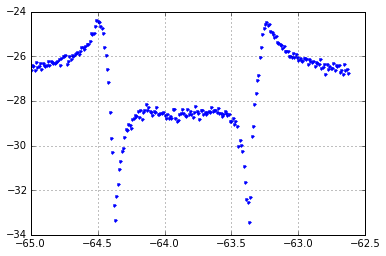

In [7]:
frq_idx = 80
thr = -24.5
plt.plot(currents*1e6, amps[:, frq_idx], '.')
plt.grid()
plt.xlim(-65, -62.5)
edge1, edge2 = np.where(amps[:, frq_idx]>thr)[0][0], np.where(amps[:, frq_idx]>thr)[0][-1]
print(np.where(amps[:, frq_idx]>thr)[0])
center = (currents[edge2]+currents[edge1])/2

In [8]:
def calculate(RWA = False):
    global delta
    osc_levels=10
    freqs1 = []
    freqs2 = []
    print(g/omega, varepsilon/omega,end=' ')
    
    X = linspace(-1.5, 1.5, 200)
    for delta in X*omega*1.7:
        evals_unpert, evecs_unpert, evals, evecs = solve_eigenproblem(RWA=RWA)
        freqs1.append(evals[1] - evals[0])
        freqs2.append(evals[2] - evals[0])
    return X, freqs1, freqs2

def calculate_test(RWA = False):
    global delta
    osc_levels=10
    freqs1 = []
    freqs2 = []
    print(g/omega, varepsilon/omega,end=' ')
    
    X = linspace(-1.5, 1.5, 200)
    for delta in X*omega*1.5:
        evals_unpert, evecs_unpert, evals, evecs = solve_eigenproblem_test(RWA=RWA)
        freqs1.append(evals[1] - evals[0])
        freqs2.append(evals[2] - evals[0])
    return X, freqs1, freqs2

0.012 0.15 

(-1.5, 1.25)

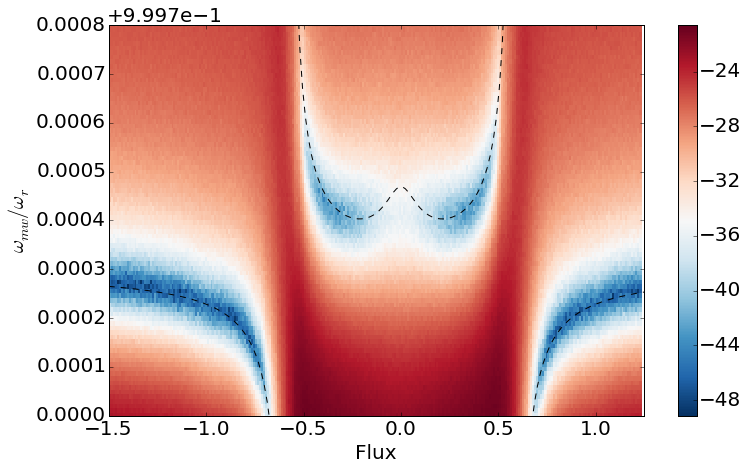

In [23]:
XX, YY = meshgrid(currents-center, freqs/1e6)
plt.pcolor(XX/1e-6-.01, YY/1.0751e4, amps.T, cmap="RdBu_r")
cb = plt.colorbar()
plt.gcf().set_size_inches(12,7)

     
g = .012*omega
varepsilon = 0.15*omega  

X, freqs1, freqs2 = calculate(RWA = True)
plt.plot(X, array(freqs1)/omega, "black", linestyle="--")
plt.plot(X, array(freqs2)/omega, 'black', linestyle="--")

plt.ylim(.9997, 1.0005)
plt.xticks(linspace(-1.5,1.5, 7))
plt.xlabel("Flux")
plt.ylabel("$\omega_{mw}/\omega_r$")
plt.xlim(-1.5, 1.25)

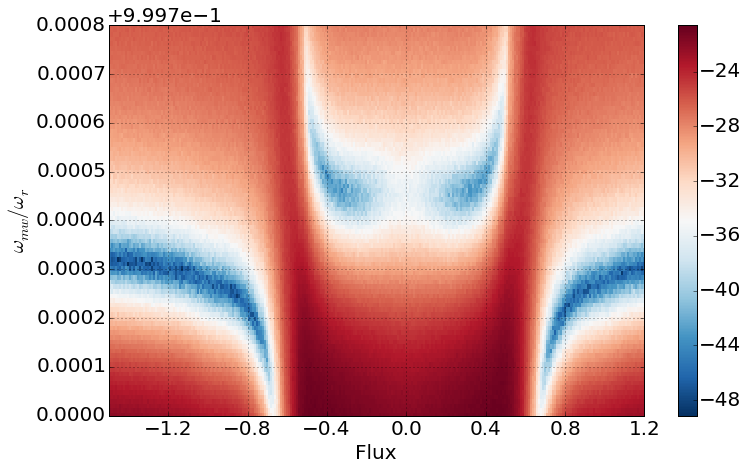

In [28]:
omega = 10.74115

g = .011*omega
varepsilon = 0.2*omega

XX, YY = meshgrid(currents-center, freqs/1e6)
plt.pcolor(XX/1e-6-.01, YY/1.07505e4, amps.T, cmap="RdBu_r")
cb = plt.colorbar()
plt.gcf().set_size_inches(12,7)

# X, freqs1, freqs2 = calculate_test(RWA=True)
# plt.plot(X, array(freqs1)/omega, "blue", linestyle="--", label="RWA")
# plt.plot(X, array(freqs2)/omega, 'blue', linestyle = '--')

# X, freqs1, freqs2 = calculate_test()
# plt.plot(X, array(freqs1)/omega, "black", label="Exact")
# plt.plot(X, array(freqs2)/omega, 'black')

         
g = .012*omega
varepsilon = 0.15*omega    

# X, freqs1, freqs2 = calculate(RWA=True)
# plt.plot(X, array(freqs1)/omega_test, "black", linestyle="--")
# plt.plot(X, array(freqs2)/omega_test, 'black', linestyle='--')

plt.ylim(.9997, 1.0005)
plt.xticks(linspace(-1.2,1.2, 7))
plt.xlabel("Flux")
plt.ylabel("$\omega_{mw}/\omega_r$")
plt.grid()
plt.xlim(-1.5, 1.2)
plt.legend(fontsize=17)

### 

0.8899999999999999 0.0035


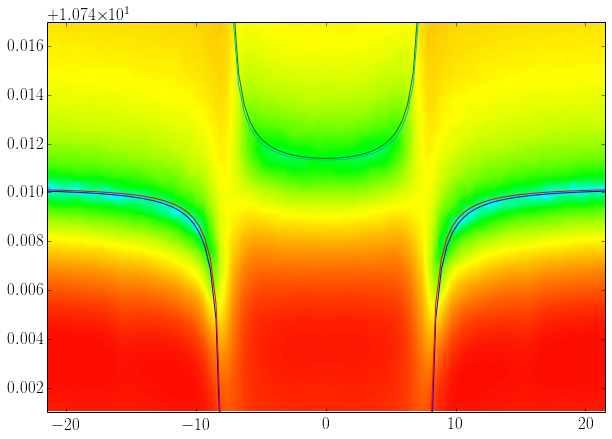

In [535]:
limit = 1.27
osc_levels=50
omega = 10.74115
g = .0025*omega
varepsilon = 0.2*omega
# for g in linspace(0.003*omega, 0.004*omega, 10):
#     for varepsilon in linspace(0.88*omega, 0.9*omega, 3):
freqs1 = []
freqs2 = []
for ME in linspace(-limit*omega, limit*omega, 100):
    evals_unpert, evecs_unpert, evals, evecs = solve_eigenproblem(MF=True, RWA=True)
    freqs1.append(evals[1] - evals[0])
    freqs2.append(evals[2] - evals[0])
print(varepsilon/omega, g/omega)
plt.plot(linspace(-2*omega, 2*omega, 100), freqs1, linspace(-2*omega, 2*omega, 100), freqs2)
freqs1 = []
freqs2 = []
for ME in linspace(-limit*omega, limit*omega, 100):
    evals_unpert, evecs_unpert, evals, evecs = solve_eigenproblem(MF=True, RWA=False)
    freqs1.append(evals[1] - evals[0])
    freqs2.append(evals[2] - evals[0])
plt.plot(linspace(-2*omega, 2*omega, 100), freqs1, linspace(-2*omega, 2*omega, 100), freqs2)

plt.ylim(10.741,10.757)
plt.xlim(-2*omega, 2*omega)
plt.gcf().set_size_inches(10,7)

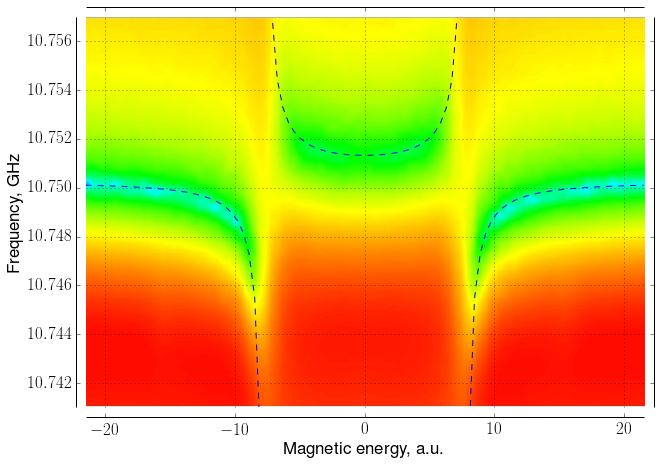

In [532]:
plt.imshow(image, extent=[-2*omega, 2*omega+0.5, 10.741, 10.757], aspect='auto')
plt.plot(linspace(-2*omega, 2*omega, 100), freqs1, 'b--', linspace(-2*omega, 2*omega, 100), freqs2, 'b--')
plt.ylim(10.741,10.757)
plt.gcf().set_size_inches(10,7)
plt.xlim(-2*omega, 2*omega)
dict(plt.gca().spines.items())["left"].set_position(('outward', 10))
dict(plt.gca().spines.items())["bottom"].set_position(('outward', 10))
dict(plt.gca().spines.items())["top"].set_position(('outward', 10))
dict(plt.gca().spines.items())["right"].set_position(('outward', 10))
gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.grid()
plt.xlabel("Magnetic energy, a.u.")
plt.ylabel("Frequency, GHz")

In [85]:
def mp(a):
    toggle1 = 0
    for i in range(0, a.shape[0]):
        if a.shape[0] > 29:
            if i>10 and i< (a.shape[0]-10):
                if toggle1 == 0:
                    for j in range(0, 35):
                        print("...", end = "")
                    print("")
                    toggle1=1
                continue
        toggle = 0
        for j in range(0, a.shape[1]):
            if a.shape[1] > 29:
                if j>10 and j< (a.shape[1]-10):
                    if toggle == 0: print(" ... ", end="")
                    toggle = 1
                    continue
            if (i==j):
                print('\x1b[31m', end="")
            print("%3.2f"%round(a[i,j],2), end=" ")
            print('\x1b[0m', end="")
        print("")